### Code caveat #1: NumPy

NumPy 라이브러리의 ndarray 클래스를 사용하면 이러한 배열에서 (a) 직관적이고 (b) 빠른 방식으로 작동할 수 있습니다.  
가장 간단한 예를 들어, 데이터를 파이썬 리스트(또는 리스트 목록)에 저장하는 경우 일반 구문을 사용하여 리스트 요소별로 추가하거나 곱하는 것은 작동하지 않지만, ndarray에서는 작동합니다:


In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [5]:
print("Python list operations:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a+b)

Python list operations:
a+b: [1, 2, 3, 4, 5, 6]


In [6]:
try:
    print(a * b)
except TypeError:
    print("a*b has no meaning for Python lists")
print()

a*b has no meaning for Python lists



In [7]:
print("Numpy array operations:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a + b)
print("a*b:", a * b)

Numpy array operations:
a+b: [5 7 9]
a*b: [ 4 10 18]


ndarray에는 n차원 배열에서 기대할 수 있는 몇 가지 특징도 있습니다. 각 ndarray에는 0에서 인덱싱된 n개의 축이 있으므로 첫 번째 축은 0, 두 번째 축은 1 등이 됩니다.  
특히 2D ndarray를 자주 다루기 때문에 axis = 0을 행으로, axis = 1을 열로 생각할 수 있습니다—그림 1-3 참조.

NumPy의 ndarray는 이러한 축을 따라 직관적인 방식으로 함수를 적용하는 것도 지원합니다.  
예를 들어, 축 0을 따라 합치는 것(2D 배열의 행)은 본질적으로 해당 축을 따라 " 배열을 붕괴시키고" 원래 배열보다 한 차원 적은 배열을 반환합니다.  
2D 배열의 경우, 이는 각 열을 합하는 것과 동일합니다:

In [12]:
a = np.array([[1,2,3],
              [4,5,6]])
print(a)

[[1 2 3]
 [4 5 6]]


NumPy ndarrays는 마지막 축에 1D 배열을 추가하는 것을 지원합니다.  
R 행과 C 열이 있는 2D 배열 a의 경우, 길이가 C인 1D 배열 b를 추가할 수 있으며, NumPy는 직관적인 방식으로 요소를 a:1의 각 행에 추가합니다.

In [13]:
b = np.array([10,20,30])
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


In [14]:
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0): [5 7 9]
a.sum(axis=1): [ 6 15]


### Code caveat #2: Type-checked functions

책이 진행될수록 많은 인수를 가진 함수를 복잡한 클래스의 일부로 작성하게 되므로 이 문제는 더욱 어려워질 것입니다.  
이를 해결하기 위해 유형 서명이 있는 함수를 전체적으로 사용할 것이며, 예를 들어 3장에서는 다음과 같이 신경망을 초기화할 것입니다:

In [17]:
# def __init__(self,
# layers: List[Layer],
# loss: Loss,
# learning_rate: float = 0.01) -> None:

각 객체의 유형을 출력하거나 각 객체에 대해 수행되는 작업을 확인하거나 이름 x1과 x2를 기반으로 추측해야만 이 함수에서 무슨 일이 일어나고 있는지 이해할 수 있습니다.

### Basic functions in NumPy

In [18]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)


In [26]:
square(np.array([1,0,0]))

array([1, 0, 0])

In [20]:
def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

NumPy의 독특한 점 중 하나는 np.function_name(ndarray) 또는 ndarray.function_name(ndarray)을 작성하여 ndarray에 많은 함수를 적용할 수 있다는 점입니다.  
예를 들어, 앞의 relu 함수는 다음과 같이 쓸 수 있습니다: x.clip(min=0).  
우리는 일관성을 유지하기 위해 np.function_name(ndarray) 관례를 사용할 것입니다—
특히, ndarray.T와 같은 2차원 ndarray를 전치하는 트릭을 피하고 np.trans pose(ndarray, (1, 0))을 작성할 것입니다.

## Derivatives

한 지점에서 함수의 미분은 해당 지점의 입력에 대한 함수 출력의 "변화율"이라고 간단히 말하는 것으로 시작하겠습니다.

### Math

입력의 특정 값 a에서 입력을 변경할 때 f의 출력이 얼마나 변하는지를 극한으로 설명할 수 있습니다:

$$ \frac{df}{dx}(a) =
\lim_{\Delta \to 0} \frac{{f \left( {a + \Delta } \right) - f\left( a - \Delta \right)}}{2 * \Delta } $$

### Diagrams

함수 f의 데카르트 표현에 단순히 접선을 그린다면, 한 지점 a에서 f의 도함수는 이 선의 기울기일 뿐입니다.

 이전 부분의 수학적 설명과 마찬가지로 실제로 이 선의 기울기를 계산할 수 있는 두 가지 방법이 있습니다.
  
  첫 번째는 미적분을 사용하여 실제로 극한을 계산하는 것입니다.  
  두 번째는 f를 -0.001과 +0.001로 연결하는 선의 기울기를 구하는 것입니다.

### Code

In [22]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

In [29]:
deriv(square, np.array([1,2,3]))

array([2., 4., 6.])

## Nested Functions

먼저 중첩 함수에 대한 데이터 유형을 정의하겠습니다:

In [30]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

그런 다음 데이터가 체인을 통과하는 방식을 먼저 길이 2로 정의하겠습니다:

In [32]:
def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

## Chain

이를 코드화하여 이러한 방식으로 미분을 계산하면 실제로 "올바른 것처럼 보이는" 결과가 나온다는 것을 보여드리겠습니다.  
6페이지의 "NumPy의 기본 함수"의 제곱 함수와 딥러닝에서 중요한 또 다른 함수인 시그모이드를 함께 사용하겠습니다:

In [33]:
def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

In [34]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

In [35]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of
    multiple consecutive ndarray -> ndarray mappings -
    Across the input_range

    ax: matplotlib Subplot for plotting
    '''

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [36]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.

    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

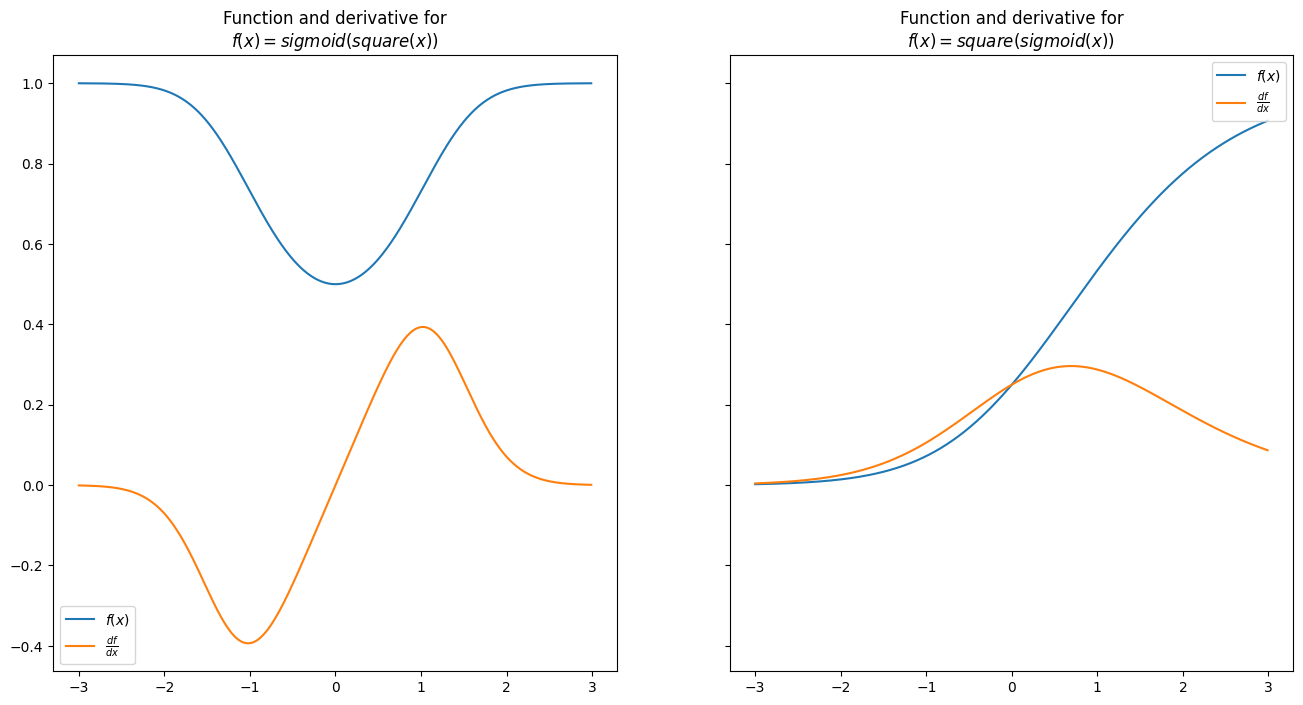

In [37]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

체인 규칙이 작동하는 것 같습니다. 함수가 위쪽으로 기울어져 있으면 도함수가 양수이고, 평평할 때는 도함수가 0이며, 아래쪽으로 기울어져 있으면 도함수가 음수입니다.  

따라서 개별 함수가 대부분 미분 가능한 한 수학적으로나 코드를 통해 f1 f2와 같은 중첩 또는 "복합" 함수의 도함수를 계산할 수 있습니다.  

딥러닝 모델은 수학적으로 이러한 대부분 미분 가능한 함수의 긴 체인이라는 것이 밝혀질 것이며, 약간 더 긴 예제를 자세히 살펴보는 것은 무슨 일이 일어나고 있는지, 그리고 어떻게 더 복잡한 모델로 일반화할 수 있는지에 대한 직관을 쌓는 데 도움이 될 것입니다.

## A Slightly Longer Example
구성 함수가 주어졌을 때 이러한 공식을 도함수 계산을 위한 코드 명령어로 어떻게 번역할 수 있을까요?

In [38]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

In [39]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

여기서 흥미로운 일이 일어났습니다 — 이 중첩 함수의 체인 규칙을 계산하기 위해 우리는 이 함수에 대해 두 가지 "통과"를 했습니다:  
1. 먼저, 우리는 이 함수를 "앞으로" 진행하여 도중에 f1_of_x와 f2_of_x의 양을 계산했습니다. 이를 "앞으로 통과"라고 부를 수 있습니다 (그리고 생각하면 됩니다).  
2. 그런 다음, 앞으로 통과할 때 계산한 양을 사용하여 도함수를 구성하는 양을 계산하면서 함수를 "뒤로" 진행했습니다.  
마지막으로, 이 양들 중 세 가지를 곱하여 도함수를 구했습니다.  
이제 지금까지 정의한 세 가지 간단한 함수인 시그모이드, 정사각형, 리퀴_렐루를 사용하여 이것이 작동한다는 것을 보여드리겠습니다.

In [41]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of
    multiple consecutive ndarray -> ndarray mappings - across one range

    ax: matplotlib Subplot for plotting
    '''

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [42]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.

    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

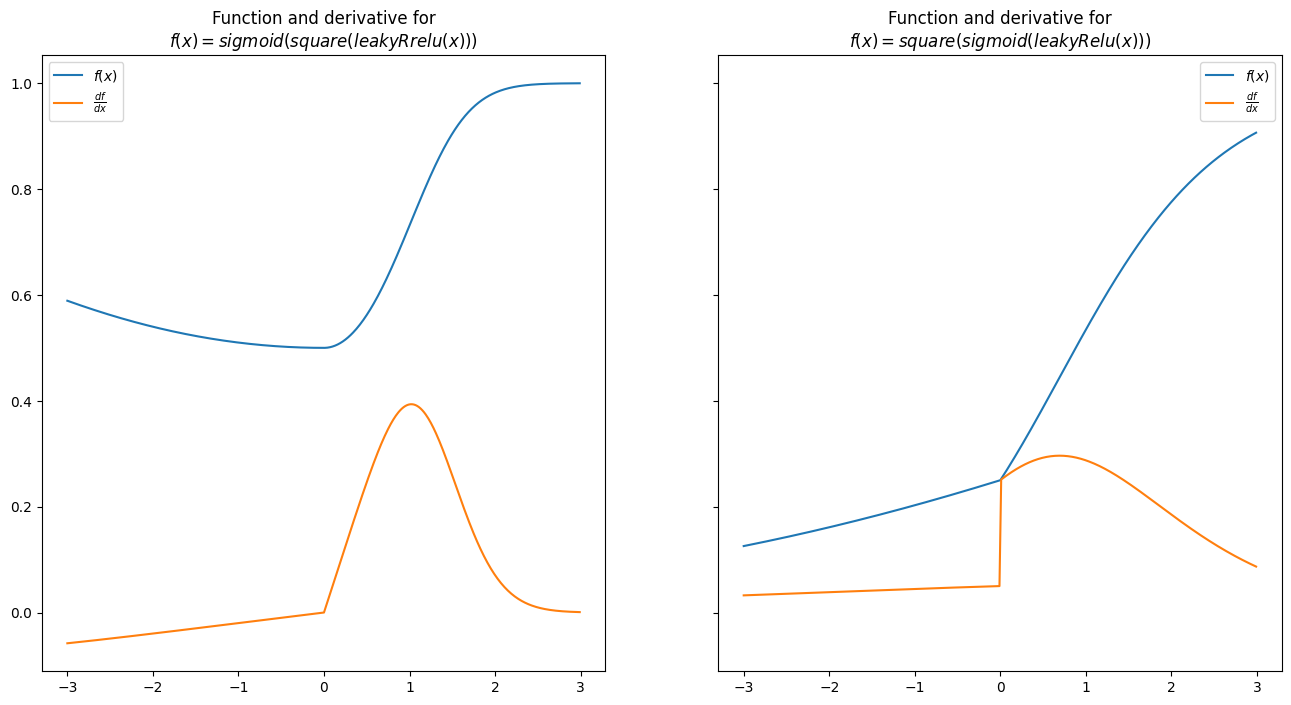

In [43]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

# plt.savefig(IMG_FOLDER_PATH + "09_plot_chain_rule_2.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "09_plot_chain_rule_2.pdf");

## Functions with Multiple Inputs


In [44]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Function with multiple inputs and addition, forward pass
    '''
    assert x.shape == y.shape

    a = x + y
    return sigma(a)

이 장의 앞부분에서 보았던 함수와 달리 이 함수는 단순히 입력 ndarray의 각 요소에서 "요소적으로" 작동하지 않습니다.  
여러 ndarray를 입력으로 사용하는 연산을 처리할 때마다 해당 연산에 필요한 모든 조건을 충족하는지 확인해야 합니다.  
여기서 덧셈과 같은 간단한 연산의 경우 요소적으로 덧셈이 일어날 수 있도록 모양이 동일한지 확인하기만 하면 됩니다.

## Derivatives of Functions with Multiple Inputs


In [45]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs
    '''
    # Compute "forward pass"
    a = x + y

    # Compute derivatives
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

## Creating New Features from Existing Features

In [46]:
def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    '''
    Computes the forward pass of a matrix multiplication
    '''

    assert X.shape[1] == W.shape[0], \
    '''
    For matrix multiplication, the number of columns in the first array should match the
    number of rows in the second, instead the number of columns in the first array is {0}
    and the number of rows in the second array is {1}
    '''.format(X.shape[1], W.shape[0])

    # matrix multiplication
    N = np.dot(X, W)

    return N

## Derivatives of Functions with Multiple Vector Inputs

In [47]:
def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    Computes the backward pass of a matrix multiplication with respect to the first argument.
    '''

    # backward pass
    dNdX = np.transpose(W, (1, 0))

    return dNdX

여기서 계산된 dNdX 양은 출력 N의 합에 대한 X의 각 요소의 편미분을 나타냅니다.  
이 양에 대한 특별한 이름이 있는데, 이를 X에 대한 X의 기울기라고 부르겠습니다.  
아이디어는 X의 개별 요소(예: x3, 즉 dNdx(dNdX[2])의 해당 요소가 x3에 대한 벡터 내적 N의 출력의 편미분이라는 것입니다.  
이 책에서 사용할 "기울기"라는 용어는 단순히 편미분의 다차원 유사체를 의미하며, 구체적으로는 해당 함수에 대한 입력의 각 요소에 대한 함수의 출력의 편미분 배열입니다.

## Vector Functions and Their Derivatives: One Step Further

In [48]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving matrix multiplication, one extra function
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    return S

## Vector Functions and Their Derivatives: The Backward Pass

In [49]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

여기서 우리는 이전 예제에서 세 개의 중첩 함수를 사용했을 때와 동일한 동역학을 보인다는 것을 주목하세요:  
우리는 순방향 패스(여기서 N만)에서 양을 계산하고, 역방향 패스 동안 이를 사용합니다.

우리가 계산하는 도함수가 맞는지 어떻게 알 수 있나요?  
간단한 테스트는 입력을 약간 교란하고 그에 따른 출력 변화를 관찰하는 것입니다. 예를 들어, 이 경우 X는 다음과 같습니다:

In [53]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)
matmul_backward_first(X, W)

[[ 0.47231121  0.61514271 -1.72622715]]


array([[ 0.92819676, -0.60754888, -1.22136052]])

x3을 -1.726에서 -1.716으로 0.01 증가시키면 x3 × 0.01에 대한 출력의 기울기의 순방향 함수에 의해 생성되는 값이 증가하는 것을 볼 수 있습니다.  

matrix_function_backward_1 함수를 사용하면 기울기가 -0.1121임을 알 수 있습니다:

In [54]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.08516695 -0.05574581 -0.11206627]]


이 기울기가 올바른지 테스트하려면 x3을 0.01만큼 증가시킨 후 함수의 출력이 약 0.01 × -0.1121 = -0.001121 감소한 것을 확인해야 합니다.  
예를 들어 이 양보다 많거나 적거나 증가한 것을 보면 체인 규칙에 대한 추론이 틀렸다는 것을 알 수 있습니다.  
그러나 이 계산을 할 때 보이는 것은 x3을 소량 증가시키면 함수의 출력 값이 실제로 0.01 × -0.1121 감소한다는 것입니다.  
즉, 우리가 계산하는 도함수가 정확하다는 것을 의미합니다!

In [55]:
def forward_test(ind1, ind2, inc):

    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

In [56]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01

array([[-0.11]])

In [57]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)

np.float64(-0.11)

## Computational Graph with Two 2D Matrix Inputs

In [58]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

## The Fun Part: The Backward Pass

In [59]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # note: I'll refer to the derivatives by their quantities here,
    # unlike the math where we referred to their function names

    # dLdS - just 1s
    dLdS = np.ones_like(S)

    # dSdN
    dSdN = deriv(sigma, N)

    # dLdN
    dLdN = dLdS * dSdN

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

In [60]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)

print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L:
2.3755

dLdX:
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


이전 예제에서와 같이 dLdX는 L에 대한 X의 기울기를 나타내기 때문에, 이는 예를 들어 왼쪽 상단 요소가 ∂ λ /$\partial x_{11}$ X, W = 0.2489를 나타낸다는 것을 의미합니다.  
따라서 이 예제의 행렬 계산이 맞다면 x11을 0.001 증가시키면 L이 0.01 × 0.2489 증가하게 됩니다. 실제로 이렇게 된다는 것을 알 수 있습니다:

In [61]:
X1 = X.copy()
X1[0, 0] += 0.001

print(round(
        (matrix_function_forward_sum(X1, W, sigmoid) - \
         matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


각 함수는 미분 가능하기 때문에 전체 함수는 x11을 입력으로 하는 단일 미분 가능 함수일 뿐이므로 기울기는 단순히 dL이 무엇인지에 대한 답이 됩니다.  
이를 시각화하려면 x11이 변할 때 L이 어떻게 변하는지 간단히 그래프로 표시하면 됩니다.

In [62]:
print("X:")
print(X)

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]


In [64]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    '''
    Computing the result of the forward pass of this function with
    input Tensors X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11

    # matrix multiplication
    N = np.dot(X1, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [65]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

이전에 정의된 계산 그래프에 X와 W를 입력한 결과, 또는 이전 코드에서 호출한 함수에 X와 W를 입력한 결과 값을 그래프로 나타내면 x11(또는 X[0, 0])의 값 외에는 아무것도 변하지 않습니다.

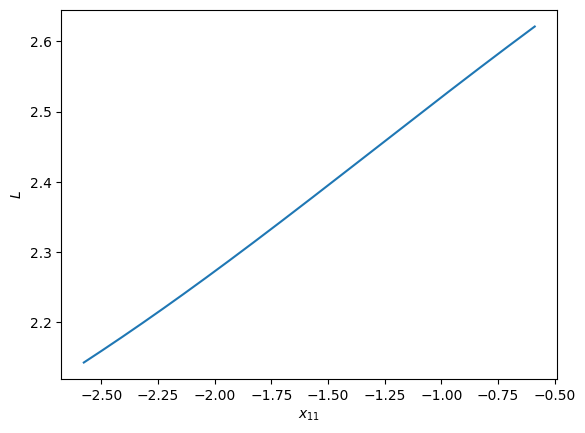

In [66]:
plt.plot(x11s, Ls);
# plt.title("Value of $L$ as $x_{11}$ changes holding\nother values of $X$ and $W$ constant")
plt.xlabel("$x_{11}$")
plt.ylabel("$L$");
# plt.savefig(IMG_FOLDER_PATH + "18_x11_vs_L.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "18_x11_vs_L.pdf");

실제로 x11의 경우 이 관계를 보면 이 함수가 L축을 따라 증가하는 거리는 대략 0.5(2.1을 조금 넘는 거리에서 2.6을 조금 넘는 거리)인 것 같고, x11축을 따라 2의 변화를 보이고 있어 "기울기"가 대략 0.5 / 2 = 0.25가 된다는 것을 알 수 있습니다. 이것이 바로 우리가 방금 계산한 것입니다!

따라서 복잡한 행렬 계산을 통해 실제로 X의 각 요소에 대한 편미분 L을 올바르게 계산한 것으로 보입니다. 또한 W에 대한 L의 기울기도 유사하게 계산할 수 있습니다.